# Minería de datos - Proyecto final

### Cristian Vargas y Miguel Piedra

## 1) Preprocesamiento de los datos

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
cervical=pd.read_csv('cervical.csv')

In [97]:
cervical.head(10)

,ID,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29
0,let-7a,865,810,5505,6692,1456,588,9,4513,1962,...,37,3174,116,1722,68,12121,14398,39196,198,1422
1,let-7a*,3,12,30,73,6,2,0,199,10,...,0,648,4,212,6,2,80,164,18,1
2,let-7b,975,2790,4912,24286,1759,508,33,6162,1455,...,99,102358,184,28274,401,14471,24097,73139,669,2492
3,let-7b*,15,18,27,119,11,3,0,116,17,...,0,334,1,189,5,34,115,230,4,15
4,let-7c,828,1251,2973,6413,713,339,23,2002,476,...,34,1711,22,3127,199,3186,1454,5883,167,321
5,let-7c*,0,0,0,1,0,0,0,3,0,...,0,4,0,2,0,0,1,1,0,0
6,let-7d,71,98,364,1890,188,47,1,719,204,...,1,2909,6,2360,3,529,2849,4937,21,154
7,let-7d*,3,24,8,41,8,2,0,38,18,...,0,95,4,35,21,14,26,18,2,0
8,let-7e,169,151,788,5801,308,121,9,1912,204,...,172,10326,312,812,38,4250,942,2388,69,25
9,let-7e*,0,1,1,7,1,0,0,14,1,...,0,53,2,2,0,1,2,7,0,0


El formato en el que se presenta la tabla no es óptimo para aplicar los algoritmos de aprendizaje automático: 

In [98]:
cervical_2=pd.DataFrame.transpose(cervical)

In [99]:
cervical_2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,704,705,706,707,708,709,710,711,712,713
ID,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
N1,865,3,975,15,828,0,71,3,169,0,...,0,2,0,0,0,0,0,0,0,1
N2,810,12,2790,18,1251,0,98,24,151,1,...,0,2,0,0,0,0,0,1,2,0
N3,5505,30,4912,27,2973,0,364,8,788,1,...,0,5,0,0,0,0,0,0,0,2
N4,6692,73,24286,119,6413,1,1890,41,5801,7,...,0,3,0,0,0,0,0,0,0,1
N5,1456,6,1759,11,713,0,188,8,308,1,...,0,0,0,0,1,5,0,0,0,0
N6,588,2,508,3,339,0,47,2,121,0,...,0,0,0,0,0,0,0,0,0,0
N7,9,0,33,0,23,0,1,0,9,0,...,0,1,0,0,0,0,0,0,0,0
N8,4513,199,6162,116,2002,3,719,38,1912,14,...,0,1,0,0,0,0,0,0,2,2
N9,1962,10,1455,17,476,0,204,18,204,1,...,0,0,0,0,0,0,0,1,0,0


Las etiquetas de cada atributo deben de estar en la primera fila. Se generó un archivo .csv y se eliminó utilizando excel:

In [100]:
#cervical_2.to_csv('cervical_2.csv')
#se eliminó primera fila en excel

In [101]:
cervical_3=pd.read_csv('cervical_2.csv')
cervical_3.head(10)

,ID,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
0,N1,865,3,975,15,828,0,71,3,169,...,0,2,0,0,0,0,0,0,0,1
1,N2,810,12,2790,18,1251,0,98,24,151,...,0,2,0,0,0,0,0,1,2,0
2,N3,5505,30,4912,27,2973,0,364,8,788,...,0,5,0,0,0,0,0,0,0,2
3,N4,6692,73,24286,119,6413,1,1890,41,5801,...,0,3,0,0,0,0,0,0,0,1
4,N5,1456,6,1759,11,713,0,188,8,308,...,0,0,0,0,1,5,0,0,0,0
5,N6,588,2,508,3,339,0,47,2,121,...,0,0,0,0,0,0,0,0,0,0
6,N7,9,0,33,0,23,0,1,0,9,...,0,1,0,0,0,0,0,0,0,0
7,N8,4513,199,6162,116,2002,3,719,38,1912,...,0,1,0,0,0,0,0,0,2,2
8,N9,1962,10,1455,17,476,0,204,18,204,...,0,0,0,0,0,0,0,1,0,0
9,N10,10167,173,18110,233,3294,3,1425,77,2943,...,1,0,1,0,2,0,0,0,0,1


In [102]:
cervical_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 715 entries, ID to Candidate-64
dtypes: int64(714), object(1)
memory usage: 324.1+ KB


Se debe agregar una columna más correspondiente a las clases (muestras normales y cancerosas):

In [103]:
normal=np.repeat('normal', 29)
cancer=np.repeat('cancer', 29)

In [104]:
clases=np.append(normal,cancer)
clases

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'cancer',
       'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer',
       'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer',
       'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer',
       'cancer', 'cancer', 'cancer', 'cancer', 'cancer', 'cancer',
       'cancer', 'cancer', 'cancer', 'cancer'],
      dtype='<U6')

In [105]:
cervical_3['Clase']=clases

In [106]:
cervical_3.head(10)

,ID,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,N1,865,3,975,15,828,0,71,3,169,...,2,0,0,0,0,0,0,0,1,normal
1,N2,810,12,2790,18,1251,0,98,24,151,...,2,0,0,0,0,0,1,2,0,normal
2,N3,5505,30,4912,27,2973,0,364,8,788,...,5,0,0,0,0,0,0,0,2,normal
3,N4,6692,73,24286,119,6413,1,1890,41,5801,...,3,0,0,0,0,0,0,0,1,normal
4,N5,1456,6,1759,11,713,0,188,8,308,...,0,0,0,1,5,0,0,0,0,normal
5,N6,588,2,508,3,339,0,47,2,121,...,0,0,0,0,0,0,0,0,0,normal
6,N7,9,0,33,0,23,0,1,0,9,...,1,0,0,0,0,0,0,0,0,normal
7,N8,4513,199,6162,116,2002,3,719,38,1912,...,1,0,0,0,0,0,0,2,2,normal
8,N9,1962,10,1455,17,476,0,204,18,204,...,0,0,0,0,0,0,1,0,0,normal
9,N10,10167,173,18110,233,3294,3,1425,77,2943,...,0,1,0,2,0,0,0,0,1,normal


In [107]:
cervical_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 716 entries, ID to Clase
dtypes: int64(714), object(2)
memory usage: 324.5+ KB


Finalmente se debe eliminar la columna ID:

In [108]:
cervical_4= cervical_3.drop('ID', axis=1)

In [109]:
cervical_4.head(10)

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,865,3,975,15,828,0,71,3,169,0,...,2,0,0,0,0,0,0,0,1,normal
1,810,12,2790,18,1251,0,98,24,151,1,...,2,0,0,0,0,0,1,2,0,normal
2,5505,30,4912,27,2973,0,364,8,788,1,...,5,0,0,0,0,0,0,0,2,normal
3,6692,73,24286,119,6413,1,1890,41,5801,7,...,3,0,0,0,0,0,0,0,1,normal
4,1456,6,1759,11,713,0,188,8,308,1,...,0,0,0,1,5,0,0,0,0,normal
5,588,2,508,3,339,0,47,2,121,0,...,0,0,0,0,0,0,0,0,0,normal
6,9,0,33,0,23,0,1,0,9,0,...,1,0,0,0,0,0,0,0,0,normal
7,4513,199,6162,116,2002,3,719,38,1912,14,...,1,0,0,0,0,0,0,2,2,normal
8,1962,10,1455,17,476,0,204,18,204,1,...,0,0,0,0,0,0,1,0,0,normal
9,10167,173,18110,233,3294,3,1425,77,2943,4,...,0,1,0,2,0,0,0,0,1,normal


Valores faltantes:

In [110]:
cervical_4.isnull()

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


No existen valores faltantes

#### Visualización de los datos

In [111]:
reads_muestra= cervical_4.sum(numeric_only=True,axis=1)

Text(0,0.5,'Número de reads')

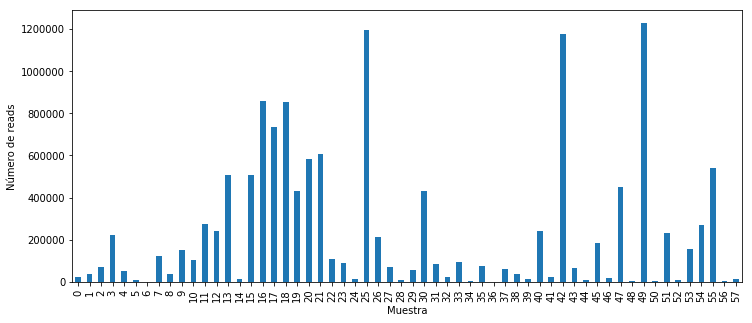

In [112]:
reads_muestra_graf= reads_muestra.plot(kind='bar', figsize=(12,5))
reads_muestra_graf.set_xlabel("Muestra")
reads_muestra_graf.set_ylabel("Número de reads")

In [113]:
muestras_norm= cervical_4.iloc[0:29]

In [114]:
reads_muestras_norm= muestras_norm.sum(numeric_only=True,axis=1)

In [115]:
muestras_cancer= cervical_4.iloc[29:58]

In [116]:
reads_muestras_cancer= muestras_cancer.sum(numeric_only=True,axis=1)

Número de reads por cada muestra clasificada como normal: 

Text(0,0.5,'Número de reads')

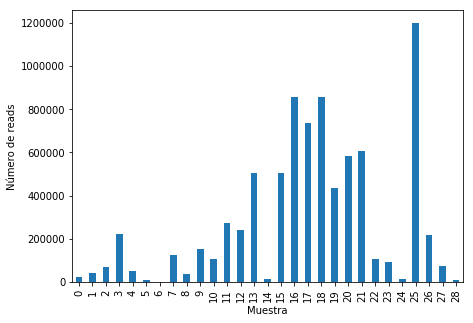

In [117]:
reads_muestras_norm_graf= reads_muestras_norm.plot(kind='bar', figsize=(7,5))
reads_muestras_norm_graf.set_xlabel('Muestra')
reads_muestras_norm_graf.set_ylabel('Número de reads')

Número de reads por cada muestra clasificada como cancerosa:

Text(0,0.5,'Número de reads')

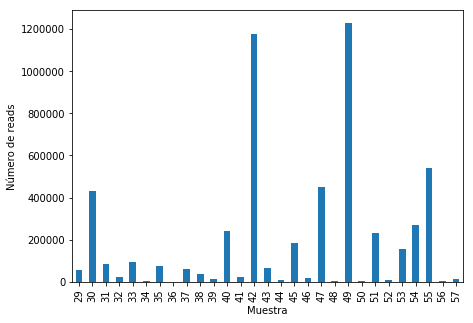

In [118]:
reads_muestras_cancer_graf= reads_muestras_cancer.plot(kind='bar', figsize=(7,5))
reads_muestras_cancer_graf.set_xlabel('Muestra')
reads_muestras_cancer_graf.set_ylabel('Número de reads')

Los datos no están normalizados.

#### Normalización de los datos:

In [119]:
from sklearn import preprocessing

Preparando el dataframe para hacer la normalización de los datos:

In [120]:
cervical_5=cervical_4.drop('Clase', axis=1)
Columnas=cervical_5.columns
cervical_5.head(10)

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
0,865,3,975,15,828,0,71,3,169,0,...,0,2,0,0,0,0,0,0,0,1
1,810,12,2790,18,1251,0,98,24,151,1,...,0,2,0,0,0,0,0,1,2,0
2,5505,30,4912,27,2973,0,364,8,788,1,...,0,5,0,0,0,0,0,0,0,2
3,6692,73,24286,119,6413,1,1890,41,5801,7,...,0,3,0,0,0,0,0,0,0,1
4,1456,6,1759,11,713,0,188,8,308,1,...,0,0,0,0,1,5,0,0,0,0
5,588,2,508,3,339,0,47,2,121,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,33,0,23,0,1,0,9,0,...,0,1,0,0,0,0,0,0,0,0
7,4513,199,6162,116,2002,3,719,38,1912,14,...,0,1,0,0,0,0,0,0,2,2
8,1962,10,1455,17,476,0,204,18,204,1,...,0,0,0,0,0,0,0,1,0,0
9,10167,173,18110,233,3294,3,1425,77,2943,4,...,1,0,1,0,2,0,0,0,0,1


Normalización de los datos utilizado el método Norm L1 (Normalización a 1):

In [121]:
cervical_norm_L1=preprocessing.normalize(cervical_5, norm='l1')
norm1=pd.DataFrame(cervical_norm_L1, columns=Columnas)
norm1.head(10)

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
0,0.038532,0.000134,0.043432,0.000668,0.036884,0.000000,0.003163,0.000134,0.007528,0.000000,...,0.000000,0.000089,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000045
1,0.020353,0.000302,0.070104,0.000452,0.031434,0.000000,0.002462,0.000603,0.003794,0.000025,...,0.000000,0.000050,0.000000,0.0,0.000000,0.000000,0.0,0.000025,0.000050,0.000000
2,0.076760,0.000418,0.068491,0.000376,0.041455,0.000000,0.005076,0.000112,0.010988,0.000014,...,0.000000,0.000070,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000028
3,0.030209,0.000330,0.109633,0.000537,0.028950,0.000005,0.008532,0.000185,0.026187,0.000032,...,0.000000,0.000014,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000005
4,0.027534,0.000113,0.033263,0.000208,0.013483,0.000000,0.003555,0.000151,0.005824,0.000019,...,0.000000,0.000000,0.000000,0.0,0.000019,0.000095,0.0,0.000000,0.000000,0.000000
5,0.064283,0.000219,0.055537,0.000328,0.037061,0.000000,0.005138,0.000219,0.013228,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,0.006808,0.000000,0.024962,0.000000,0.017398,0.000000,0.000756,0.000000,0.006808,0.000000,...,0.000000,0.000756,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.036120,0.001593,0.049317,0.000928,0.016023,0.000024,0.005754,0.000304,0.015303,0.000112,...,0.000000,0.000008,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000016,0.000016
8,0.052588,0.000268,0.038999,0.000456,0.012758,0.000000,0.005468,0.000482,0.005468,0.000027,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000027,0.000000,0.000000
9,0.067385,0.001147,0.120029,0.001544,0.021832,0.000020,0.009445,0.000510,0.019506,0.000027,...,0.000007,0.000000,0.000007,0.0,0.000013,0.000000,0.0,0.000000,0.000000,0.000007


Normalización de los datos utilizado el método Norm L2 (Buscar fórmula):

In [122]:
cervical_norm_L2=preprocessing.normalize(cervical_5, norm='l2')
norm2=pd.DataFrame(cervical_norm_L2, columns=Columnas)
norm2.head(10)

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
0,0.122731,0.000426,0.138338,0.002128,0.117481,0.000000,0.010074,0.000426,0.023979,0.000000,...,0.00000,0.000284,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000142
1,0.062250,0.000922,0.214415,0.001383,0.096141,0.000000,0.007531,0.001844,0.011605,0.000077,...,0.00000,0.000154,0.00000,0.0,0.000000,0.000000,0.0,0.000077,0.000154,0.000000
2,0.333926,0.001820,0.297955,0.001638,0.180338,0.000000,0.022080,0.000485,0.047799,0.000061,...,0.00000,0.000303,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000121
3,0.103876,0.001133,0.376978,0.001847,0.099545,0.000016,0.029337,0.000636,0.090046,0.000109,...,0.00000,0.000047,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000016
4,0.072515,0.000299,0.087606,0.000548,0.035511,0.000000,0.009363,0.000398,0.015340,0.000050,...,0.00000,0.000000,0.00000,0.0,0.000050,0.000249,0.0,0.000000,0.000000,0.000000
5,0.215310,0.000732,0.186016,0.001099,0.124133,0.000000,0.017210,0.000732,0.044307,0.000000,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,0.026098,0.000000,0.095693,0.000000,0.066695,0.000000,0.002900,0.000000,0.026098,0.000000,...,0.00000,0.002900,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,0.156020,0.006880,0.213028,0.004010,0.069212,0.000104,0.024857,0.001314,0.066100,0.000484,...,0.00000,0.000035,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000069,0.000069
8,0.217161,0.001107,0.161044,0.001882,0.052685,0.000000,0.022579,0.001992,0.022579,0.000111,...,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000111,0.000000,0.000000
9,0.300752,0.005118,0.535716,0.006892,0.097440,0.000089,0.042153,0.002278,0.087057,0.000118,...,0.00003,0.000000,0.00003,0.0,0.000059,0.000000,0.0,0.000000,0.000000,0.000030


Normalización de los datos utilizado Counts per Million (CPM):

In [123]:
norm3=norm1.multiply(1000000)

In [124]:
norm3.head(10)

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-57-3p,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64
0,38531.783153,133.636242,43431.778698,668.181211,36883.602833,0.000000,3162.724398,133.636242,7528.174974,0.000000,...,0.000000,89.090828,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44.545414
1,20352.781547,301.522690,70104.025328,452.284034,31433.740389,0.000000,2462.435298,603.045379,3794.160511,25.126891,...,0.000000,50.253782,0.000000,0.0,0.000000,0.000000,0.0,25.126891,50.253782,0.000000
2,76760.042947,418.310861,68491.431599,376.479775,41454.606300,0.000000,5075.505110,111.549563,10987.631942,13.943695,...,0.000000,69.718477,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,27.887391
3,30209.461900,329.541351,109633.441676,537.197544,28949.981943,4.514265,8531.960997,185.084868,26187.251715,31.599856,...,0.000000,13.542795,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.514265
4,27533.518655,113.462302,33263.364914,208.014221,13483.103572,0.000000,3555.152134,151.283070,5824.398177,18.910384,...,0.000000,0.000000,0.000000,0.0,18.910384,94.551918,0.0,0.000000,0.000000,0.000000
5,64283.371597,218.650924,55537.334645,327.976386,37061.331584,0.000000,5138.296709,218.650924,13228.380890,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,6807.866868,0.000000,24962.178517,0.000000,17397.881997,0.000000,756.429652,0.000000,6807.866868,0.000000,...,0.000000,756.429652,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,36119.603669,1592.688041,49317.305076,928.401069,16022.921902,24.010372,5754.485938,304.131385,15302.610728,112.048405,...,0.000000,8.003457,0.000000,0.0,0.000000,0.000000,0.0,0.000000,16.006915,16.006915
8,52587.847436,268.031842,38998.633038,455.654132,12758.315688,0.000000,5467.849581,482.457316,5467.849581,26.803184,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,26.803184,0.000000,0.000000
9,67384.676564,1146.606575,120029.162248,1544.273595,21831.919406,19.883351,9444.591729,510.339343,19505.567338,26.511135,...,6.627784,0.000000,6.627784,0.0,13.255567,0.000000,0.0,0.000000,0.000000,6.627784


Comparación de los resultados normalizados:

In [125]:
norm_sum=pd.DataFrame()
norm1_sum=norm1.sum(axis=1)
norm_sum['norm L1']=norm1_sum
norm2_sum=norm2.sum(axis=1)
norm_sum['norm L2']=norm2_sum
norm3_sum=norm3.sum(axis=1)
norm_sum['CPM']=norm3_sum
norm_sum['Clase']=clases
norm_sum.head(10)

,norm L1,norm L2,CPM,Clase
0,1.0,3.185185,1000000.0,normal
1,1.0,3.058532,1000000.0,normal
2,1.0,4.350258,1000000.0,normal
3,1.0,3.438527,1000000.0,normal
4,1.0,2.633717,1000000.0,normal
5,1.0,3.349390,1000000.0,normal
6,1.0,3.833511,1000000.0,normal
7,1.0,4.319533,1000000.0,normal
8,1.0,4.129485,1000000.0,normal
9,1.0,4.463212,1000000.0,normal


Restaura la columna "Clase" en los conjuntos de datos normalizados:

In [126]:
norm1['Clase']=clases
norm2['Clase']=clases
norm3['Clase']=clases

### Gráfica para los datos normalizados en base a 1 (Norm L1):

In [127]:
norm1.head()

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,0.038532,0.000134,0.043432,0.000668,0.036884,0.000000,0.003163,0.000134,0.007528,0.000000,...,0.000089,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000045,normal
1,0.020353,0.000302,0.070104,0.000452,0.031434,0.000000,0.002462,0.000603,0.003794,0.000025,...,0.000050,0.0,0.0,0.000000,0.000000,0.0,0.000025,0.00005,0.000000,normal
2,0.076760,0.000418,0.068491,0.000376,0.041455,0.000000,0.005076,0.000112,0.010988,0.000014,...,0.000070,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000028,normal
3,0.030209,0.000330,0.109633,0.000537,0.028950,0.000005,0.008532,0.000185,0.026187,0.000032,...,0.000014,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000005,normal
4,0.027534,0.000113,0.033263,0.000208,0.013483,0.000000,0.003555,0.000151,0.005824,0.000019,...,0.000000,0.0,0.0,0.000019,0.000095,0.0,0.000000,0.00000,0.000000,normal


In [128]:
reads_muestra_norm1=norm1_sum

Text(0,0.5,'Número de reads')

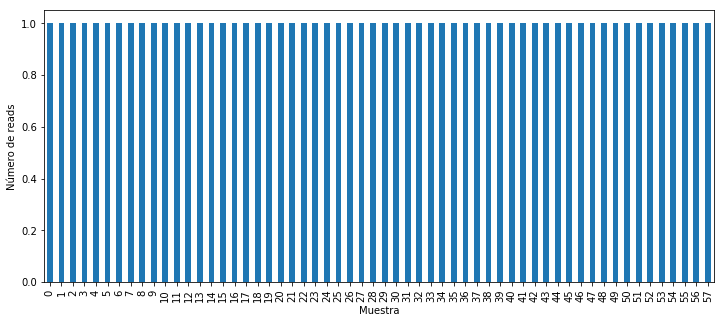

In [129]:
reads_muestra_norm1_graf=reads_muestra_norm1.plot(kind='bar', figsize=(12,5))
reads_muestra_norm1_graf.set_xlabel("Muestra")
reads_muestra_norm1_graf.set_ylabel("Número de reads")

### Gráfica para los datos normalizados con Norm L2:

In [130]:
norm2.head()

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,0.122731,0.000426,0.138338,0.002128,0.117481,0.000000,0.010074,0.000426,0.023979,0.000000,...,0.000284,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000142,normal
1,0.062250,0.000922,0.214415,0.001383,0.096141,0.000000,0.007531,0.001844,0.011605,0.000077,...,0.000154,0.0,0.0,0.00000,0.000000,0.0,0.000077,0.000154,0.000000,normal
2,0.333926,0.001820,0.297955,0.001638,0.180338,0.000000,0.022080,0.000485,0.047799,0.000061,...,0.000303,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000121,normal
3,0.103876,0.001133,0.376978,0.001847,0.099545,0.000016,0.029337,0.000636,0.090046,0.000109,...,0.000047,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000016,normal
4,0.072515,0.000299,0.087606,0.000548,0.035511,0.000000,0.009363,0.000398,0.015340,0.000050,...,0.000000,0.0,0.0,0.00005,0.000249,0.0,0.000000,0.000000,0.000000,normal


In [131]:
reads_muestra_norm2=norm2_sum

Text(0,0.5,'Número de reads')

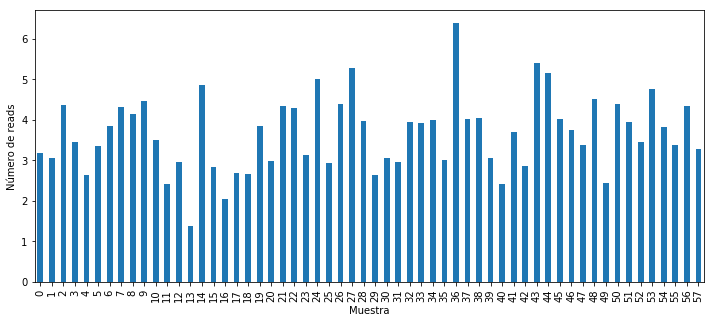

In [132]:
reads_muestra_norm2_graf=reads_muestra_norm2.plot(kind='bar', figsize=(12,5))
reads_muestra_norm2_graf.set_xlabel("Muestra")
reads_muestra_norm2_graf.set_ylabel("Número de reads")

### Gráfica para los datos normalizados en CPMs:

In [133]:
norm3.head()

,let-7a,let-7a*,let-7b,let-7b*,let-7c,let-7c*,let-7d,let-7d*,let-7e,let-7e*,...,Candidate-58-3p,Candidate-58-5p,Candidate-59-3p,Candidate-59-5p,Candidate-60,Candidate-61,Candidate-62,Candidate-63,Candidate-64,Clase
0,38531.783153,133.636242,43431.778698,668.181211,36883.602833,0.000000,3162.724398,133.636242,7528.174974,0.000000,...,89.090828,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,44.545414,normal
1,20352.781547,301.522690,70104.025328,452.284034,31433.740389,0.000000,2462.435298,603.045379,3794.160511,25.126891,...,50.253782,0.0,0.0,0.000000,0.000000,0.0,25.126891,50.253782,0.000000,normal
2,76760.042947,418.310861,68491.431599,376.479775,41454.606300,0.000000,5075.505110,111.549563,10987.631942,13.943695,...,69.718477,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,27.887391,normal
3,30209.461900,329.541351,109633.441676,537.197544,28949.981943,4.514265,8531.960997,185.084868,26187.251715,31.599856,...,13.542795,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.514265,normal
4,27533.518655,113.462302,33263.364914,208.014221,13483.103572,0.000000,3555.152134,151.283070,5824.398177,18.910384,...,0.000000,0.0,0.0,18.910384,94.551918,0.0,0.000000,0.000000,0.000000,normal


In [134]:
reads_muestra_norm3=norm3_sum

Text(0,0.5,'Número de reads')

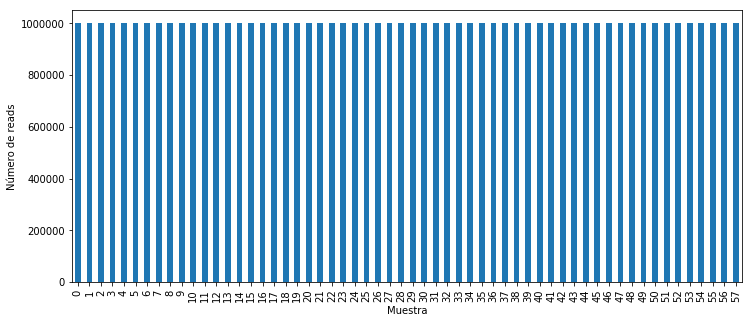

In [41]:
reads_muestra_norm3_graf=reads_muestra_norm3.plot(kind='bar', figsize=(12,5))
reads_muestra_norm3_graf.set_xlabel("Muestra")
reads_muestra_norm3_graf.set_ylabel("Número de reads")

#### Visualización de agrupamiento de los datos:

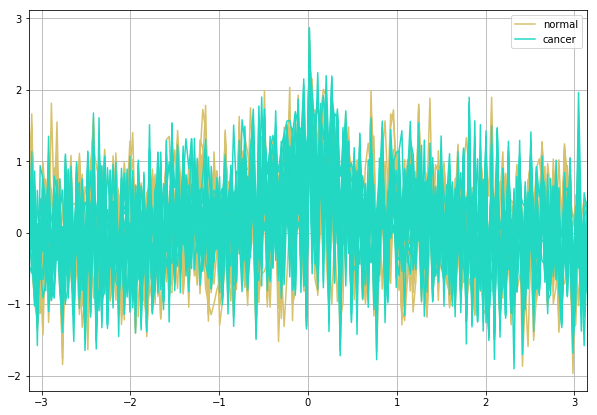

In [135]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(10,7))
andrews_curves(norm2, 'Clase')

## 2) Clasificación mediante aprendizaje supervisado

In [136]:
from sklearn.model_selection import train_test_split

### Datos normalizados utilizado el método Norm L1 (Normalización a 1):

In [137]:
norm1=norm1.drop('Clase', axis=1)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(norm1, clases, test_size=0.30, random_state=42)

#### RandomForestClassifier:

In [139]:
from sklearn.ensemble import RandomForestClassifier

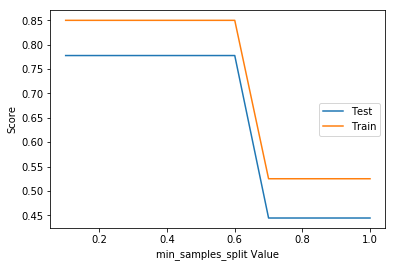

In [140]:
lista_resultados1=[]
lista_resultados2=[]
numeros = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in numeros:
    clf1=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=i)
    clf1.fit(x_train, y_train)
    score_temp=clf1.score(x_test, y_test)
    score_temp2=clf1.score(x_train, y_train)
    lista_resultados1.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados1, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("min_samples_split Value")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

In [141]:
clf2=RandomForestClassifier(n_estimators=1, max_depth=None, random_state=0, min_samples_split=0.65)
clf2.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf2.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf2.score(x_test, y_test)))

Training score: 0.850
Testing score: 0.778


Se puede mejorar la generalización con este clasificador. Se evaluarán los n estimators utilizando el min_samples_split=0.65

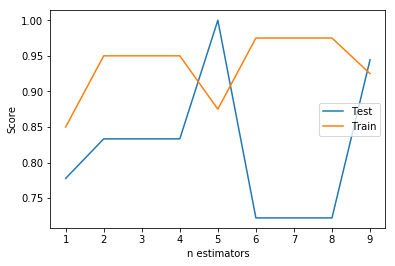

In [142]:
lista_resultados3=[]
lista_resultados4=[]
numeros = range(1,10)
for i in numeros:
    clf3=RandomForestClassifier(n_estimators=i, max_depth=1, random_state=0, min_samples_split=0.65)
    clf3.fit(x_train, y_train)
    score_temp=clf3.score(x_test, y_test)
    score_temp2=clf3.score(x_train, y_train)
    lista_resultados3.append(score_temp)
    lista_resultados4.append(score_temp2)
    

plt.plot(numeros,lista_resultados3, label="Test")
plt.plot(numeros,lista_resultados4, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

In [143]:
clf4=RandomForestClassifier(n_estimators=5, max_depth=None, random_state=0, min_samples_split=0.65)
clf4.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf4.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf4.score(x_test, y_test)))

Training score: 0.875
Testing score: 1.000


#### GradientBoostingClassifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

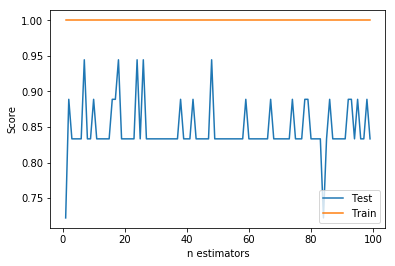

In [145]:
lista_resultados5=[]
lista_resultados6=[]
numeros = range(1,100)
for i in numeros:
    clf5=GradientBoostingClassifier(n_estimators=i, learning_rate=0.6, max_depth=9)
    clf5.fit(x_train, y_train)
    score_temp=clf5.score(x_test, y_test)
    score_temp2=clf5.score(x_train, y_train)
    lista_resultados5.append(score_temp)
    lista_resultados6.append(score_temp2)
    

plt.plot(numeros,lista_resultados5, label="Test")
plt.plot(numeros,lista_resultados6, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

In [150]:
clf6=GradientBoostingClassifier(n_estimators=5, learning_rate=41, max_depth=1)
clf6.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf6.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf6.score(x_test, y_test)))

Training score: 0.950
Testing score: 0.833


Siempre se obtiene un overfit con el GradientBoostingClassifier para los datos normalizados con Norm L1.

#### BaggingClassifier

In [151]:
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

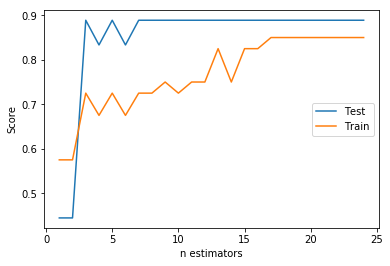

In [152]:
lista_resultados7=[]
lista_resultados8=[]
svc = svm.SVC(kernel='linear', C=1.0)
numeros = range(1,25)
for i in numeros:
    clf7=BaggingClassifier(n_estimators = i, random_state=0, base_estimator = svc)
    clf7.fit(x_train, y_train)
    score_temp=clf7.score(x_test, y_test)
    score_temp2=clf7.score(x_train, y_train)
    lista_resultados7.append(score_temp)
    lista_resultados8.append(score_temp2)
    

plt.plot(numeros,lista_resultados7, label="Test")
plt.plot(numeros,lista_resultados8, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

In [153]:
svc = svm.SVC(kernel='linear', C=1.0)
clf8=BaggingClassifier(n_estimators = 18, random_state=0, base_estimator = svc)
clf8.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf8.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf8.score(x_test, y_test)))

Training score: 0.850
Testing score: 0.889


### Datos normalizados utilizado el método Norm L2:

In [154]:
norm2=norm2.drop('Clase', axis=1)

In [155]:
x_train, x_test, y_train, y_test = train_test_split(norm2, clases, test_size=0.30, random_state=42)

#### RandomForestClassifier

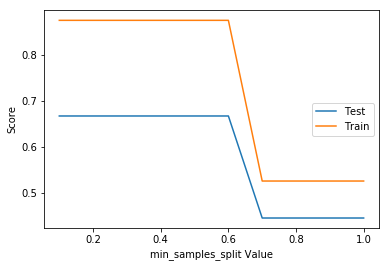

In [156]:
lista_resultados9=[]
lista_resultados10=[]
numeros = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in numeros:
    clf9=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=i)
    clf9.fit(x_train, y_train)
    score_temp=clf9.score(x_test, y_test)
    score_temp2=clf9.score(x_train, y_train)
    lista_resultados9.append(score_temp)
    lista_resultados10.append(score_temp2)
    

plt.plot(numeros,lista_resultados9, label="Test")
plt.plot(numeros,lista_resultados10, label="Train")
plt.xlabel("min_samples_split Value")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

In [157]:
clf10=RandomForestClassifier(n_estimators=1, max_depth=None, random_state=0, min_samples_split=0.6)
clf10.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf10.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf10.score(x_test, y_test)))

Training score: 0.875
Testing score: 0.667


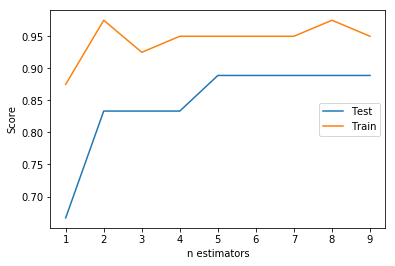

In [158]:
lista_resultados11=[]
lista_resultados12=[]
numeros = range(1,10)
for i in numeros:
    clf11=RandomForestClassifier(n_estimators=i, max_depth=1, random_state=0, min_samples_split=0.6)
    clf11.fit(x_train, y_train)
    score_temp=clf11.score(x_test, y_test)
    score_temp2=clf11.score(x_train, y_train)
    lista_resultados11.append(score_temp)
    lista_resultados12.append(score_temp2)
    

plt.plot(numeros,lista_resultados11, label="Test")
plt.plot(numeros,lista_resultados12, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

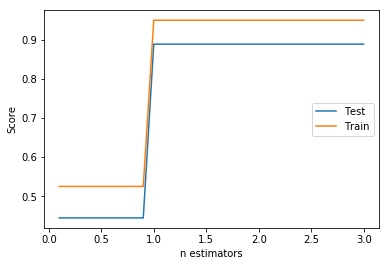

In [159]:
lista_resultados13=[]
lista_resultados14=[]
numeros = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0]
for i in numeros:
    clf12=RandomForestClassifier(n_estimators=10, max_depth=i, random_state=0, min_samples_split=0.6)
    clf12.fit(x_train, y_train)
    score_temp=clf12.score(x_test, y_test)
    score_temp2=clf12.score(x_train, y_train)
    lista_resultados13.append(score_temp)
    lista_resultados14.append(score_temp2)
    

plt.plot(numeros,lista_resultados13, label="Test")
plt.plot(numeros,lista_resultados14, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=5)
plt.show()

Siempre se obtiene un overfit con el RandomForestClassifier para los datos normalizados con Norm L2, por lo que es necesario utilizar otro clasificador:

#### GradientBoostingClassifier

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

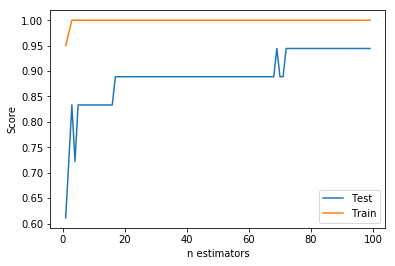

In [161]:
lista_resultados15=[]
lista_resultados16=[]
numeros = range(1,100)
for i in numeros:
    clf13=GradientBoostingClassifier(n_estimators=i, learning_rate=0.1, max_depth=1)
    clf13.fit(x_train, y_train)
    score_temp=clf13.score(x_test, y_test)
    score_temp2=clf13.score(x_train, y_train)
    lista_resultados15.append(score_temp)
    lista_resultados16.append(score_temp2)
    

plt.plot(numeros,lista_resultados15, label="Test")
plt.plot(numeros,lista_resultados16, label="Train")
plt.xlabel("n estimators")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

In [162]:
clf14=GradientBoostingClassifier(n_estimators=5, learning_rate=41, max_depth=1)
clf14.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf14.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf14.score(x_test, y_test)))

Training score: 0.950
Testing score: 0.611


De igual forma se obtiene sobreajuste utilizando el GradientBoostingClassifier.

Se intentará una vez más con un clasificador MLP.

#### MLPClassifier

In [163]:
from sklearn.neural_network import MLPClassifier

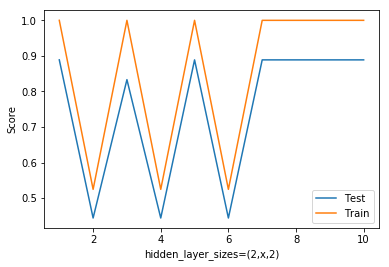

In [164]:
lista_resultados17=[]
lista_resultados18=[]
numeros = range(1,11)
for i in numeros:
    clf15=MLPClassifier(activation="logistic", hidden_layer_sizes=(2,i,3), random_state=1, solver="lbfgs", max_iter=10000)
    clf15.fit(x_train, y_train)
    score_temp=clf15.score(x_test, y_test)
    score_temp2=clf15.score(x_train, y_train)
    lista_resultados17.append(score_temp)
    lista_resultados18.append(score_temp2)
    

plt.plot(numeros,lista_resultados17, label="Test")
plt.plot(numeros,lista_resultados18, label="Train")
plt.xlabel("hidden_layer_sizes=(2,x,2)")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

In [165]:
clf16=MLPClassifier(activation="logistic", hidden_layer_sizes=(2,6), random_state=1, solver="lbfgs", max_iter=10000)
clf16.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf16.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf16.score(x_test, y_test)))

Training score: 1.000
Testing score: 0.833


No se logró eliminar el overfitting de los datos normalizados con Norm L2. Se concluye que este método de normalización no es el correcto para el conjunto de datos.

### Datos normalizados utilizado Counts per Million (CPM):

In [166]:
norm3=norm3.drop('Clase', axis=1)

In [167]:
x_train, x_test, y_train, y_test = train_test_split(norm3, clases, test_size=0.30, random_state=42)

Los resultados en base a 1 millón no serán diferentes a los resultados obtenidos con la normalización L1 (en base a 1). Como ya se obtuvieron resultados positivos utilizando el RandomForestClassifier y los datos normalizados con Norm L1, se utilizará otro algoritmo para comparar resultados.

#### MLPClassifier

In [168]:
from sklearn.neural_network import MLPClassifier

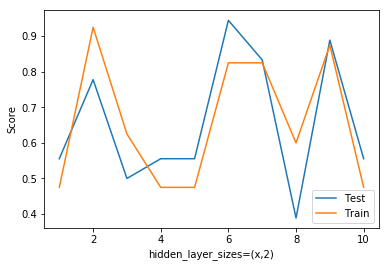

In [169]:
lista_resultados19=[]
lista_resultados20=[]
numeros = range(1,11)
for i in numeros:
    clf17=MLPClassifier(activation="relu", hidden_layer_sizes=(i,3), random_state=1, solver="adam", max_iter=10000)
    clf17.fit(x_train, y_train)
    score_temp=clf17.score(x_test, y_test)
    score_temp2=clf17.score(x_train, y_train)
    lista_resultados19.append(score_temp)
    lista_resultados20.append(score_temp2)
    

plt.plot(numeros,lista_resultados19, label="Test")
plt.plot(numeros,lista_resultados20, label="Train")
plt.xlabel("hidden_layer_sizes=(x,2)")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

In [170]:
clf18=MLPClassifier(activation="relu", hidden_layer_sizes=(6,3), random_state=1, solver="adam", max_iter=10000)
clf18.fit(x_train, y_train)
print("Training score: {:.3f}".format(clf18.score(x_train, y_train)))
print("Testing score: {:.3f}".format(clf18.score(x_test, y_test)))

Training score: 0.825
Testing score: 0.944


## 3) Validación cruzada

In [171]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import LeaveOneOut

### Datos normalizados utilizado el método Norm L1 (Normalización a 1):

#### RandomForestClassifier:

Método Leave One Out:

In [172]:
loo = LeaveOneOut()
clf19=RandomForestClassifier(n_estimators=5, max_depth=None, random_state=0, min_samples_split=0.65)
scores = cross_val_score(clf19, norm1, clases, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  58
Mean accuracy: 0.83


Método Shuffle Split:

In [175]:
shuffle_split = ShuffleSplit(test_size=.3, n_splits=5)
clf20=RandomForestClassifier(n_estimators=5, max_depth=None, random_state=0, min_samples_split=0.65)
scores = cross_val_score(clf20, norm1, clases, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.77777778  0.88888889  0.88888889  0.88888889  0.88888889]
Mean accuracy: 0.87


#### BaggingClassifier

Método Leave One Out:

In [176]:
loo = LeaveOneOut()
svc = svm.SVC(kernel='linear', C=1.0)
clf21=BaggingClassifier(n_estimators = 17, random_state=0, base_estimator = svc)
scores = cross_val_score(clf21, norm1, clases, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  58
Mean accuracy: 0.88


Método Shuffle Split:

In [182]:
shuffle_split = ShuffleSplit(test_size=.3, n_splits=5)
svc = svm.SVC(kernel='linear', C=1.0)
clf22=BaggingClassifier(n_estimators = 17, random_state=0, base_estimator = svc)
scores = cross_val_score(clf22, norm1, clases, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.83333333  0.94444444  0.72222222  0.44444444  0.77777778]
Mean accuracy: 0.74


### Datos normalizados utilizado el método Norm L2:

No se encontró un algoritmo que generalizara bien con los datos normalizados con Norm L2, por lo que se optó dejar por fuera a los mismos.

### Datos normalizados utilizado Counts per Million (CPM):

#### MLPClassifier

Método Leave One Out:

In [192]:
loo = LeaveOneOut()
clf23=MLPClassifier(activation="relu", hidden_layer_sizes=(6,3), random_state=1, solver="adam", max_iter=10000)
scores = cross_val_score(clf23, norm1, clases, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  58
Mean accuracy: 0.93


Método Shuffle Split:

In [191]:
shuffle_split = ShuffleSplit(test_size=.3, n_splits=5)
clf24=MLPClassifier(activation="relu", hidden_layer_sizes=(6,3), random_state=1, solver="adam", max_iter=500)
scores = cross_val_score(clf24, norm3, clases, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.72222222  0.66666667  0.88888889  0.88888889  0.94444444]
Mean accuracy: 0.82
